In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression

from lazypredict.Supervised import LazyClassifier

In [3]:
data=pd.read_csv(r'D:\data_science trainee\TASK_1\2\weather_forecast_data.csv')

In [4]:
data

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain
...,...,...,...,...,...,...
2495,21.791602,45.270902,11.807192,55.044682,1017.686181,no rain
2496,27.558479,46.481744,10.884915,39.715133,1008.590961,no rain
2497,28.108274,43.817178,2.897128,75.842952,999.119187,no rain
2498,14.789275,57.908105,2.374717,2.378743,1046.501875,no rain


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2500 non-null   float64
 1   Humidity     2500 non-null   float64
 2   Wind_Speed   2500 non-null   float64
 3   Cloud_Cover  2500 non-null   float64
 4   Pressure     2500 non-null   float64
 5   Rain         2500 non-null   object 
dtypes: float64(5), object(1)
memory usage: 117.3+ KB


In [6]:
data.isnull().sum()

Temperature    0
Humidity       0
Wind_Speed     0
Cloud_Cover    0
Pressure       0
Rain           0
dtype: int64

In [7]:
data.head()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain


In [8]:
label=LabelEncoder()
data['Rain_encoded']=label.fit_transform(data['Rain'])
data.head()


,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain,Rain_encoded
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain,1
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain,0
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain,0
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain,1
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain,0


<Axes: >

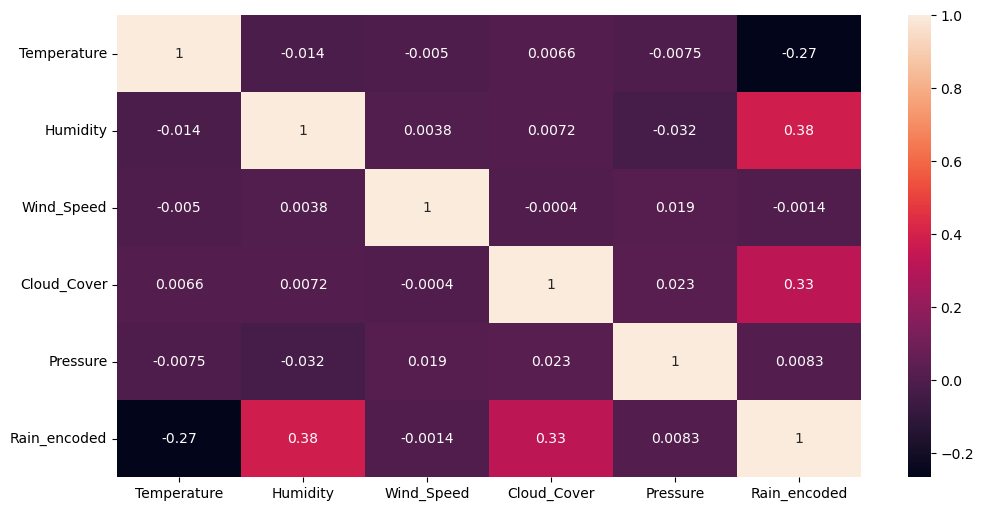

In [9]:
plt.figure(figsize=(12,6))
sns.heatmap(data.drop('Rain',axis=1).corr(),annot=True)

<Axes: title={'center': 'Temperature Humidity'}, xlabel='Temperature', ylabel='Humidity'>

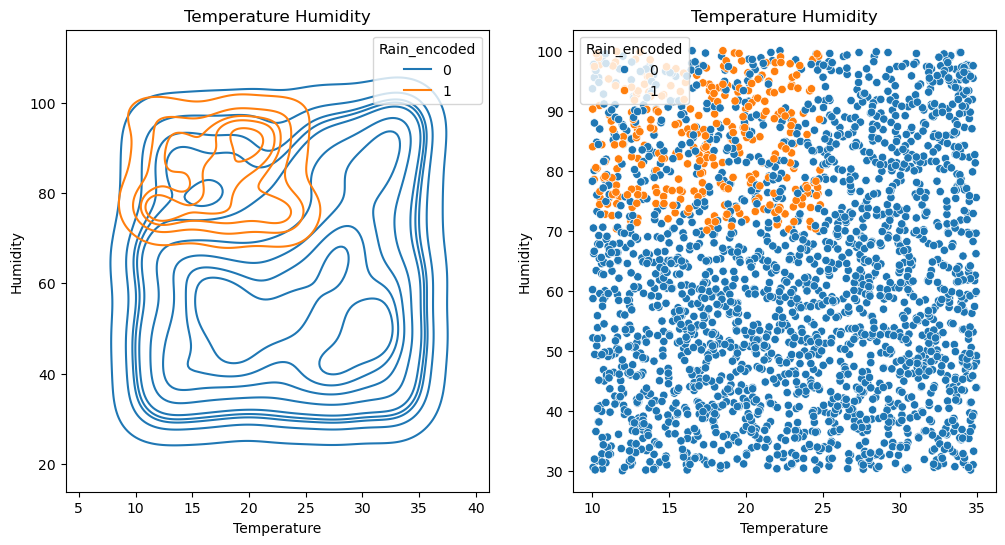

In [10]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title('Temperature Humidity')
sns.kdeplot(x=data['Temperature'],y=data['Humidity'],hue=data['Rain_encoded'])

plt.subplot(1,2,2)
plt.title('Temperature Humidity')
sns.scatterplot(x=data['Temperature'],y=data['Humidity'],hue=data['Rain_encoded'])

<Axes: title={'center': 'Wind_Speed and Cloud_Cover'}, xlabel='Wind_Speed', ylabel='Cloud_Cover'>

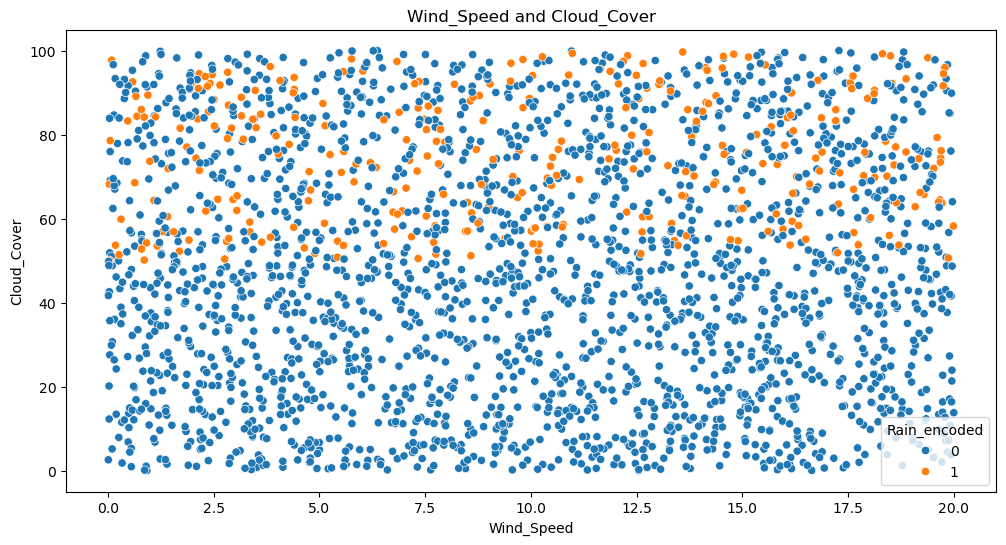

In [11]:
plt.figure(figsize=(12,6))
plt.title('Wind_Speed and Cloud_Cover')
sns.scatterplot(x=data['Wind_Speed'],y=data['Cloud_Cover'],hue=data['Rain_encoded'])

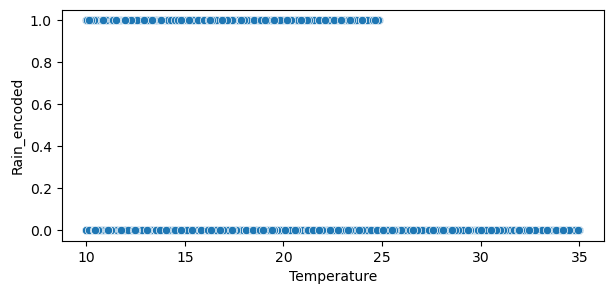

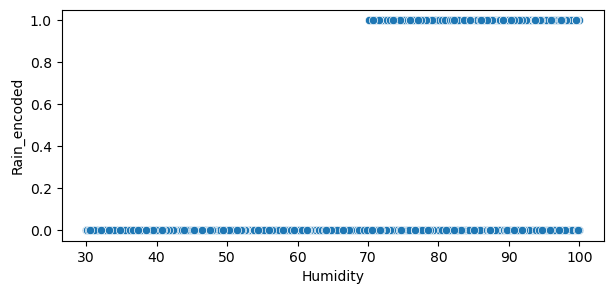

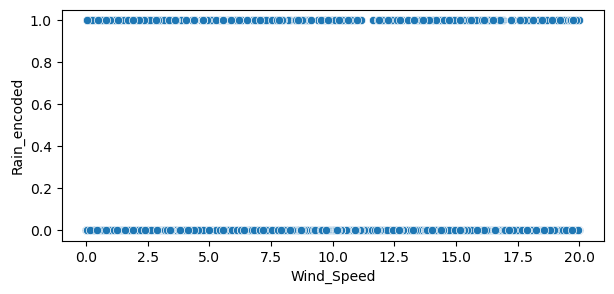

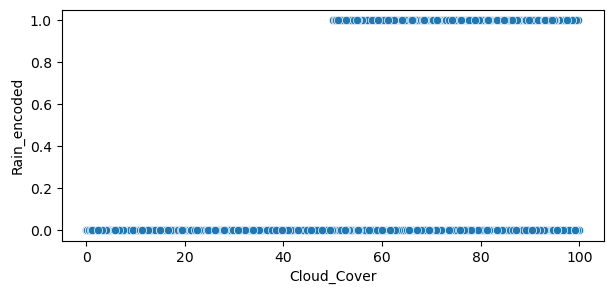

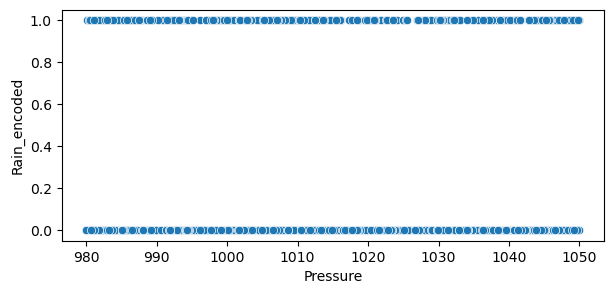

In [12]:
columns=['Temperature','Humidity','Wind_Speed','Cloud_Cover','Pressure']

for i in columns:
    plt.figure(figsize=(7,3))
    sns.scatterplot(x=data[i],y=data['Rain_encoded'])

In [13]:
x=data.drop(['Rain','Rain_encoded'],axis=1)
y=data['Rain_encoded']
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7)

In [14]:
lr=LogisticRegression(max_iter=1000)
lr.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [15]:
y_predict = lr.predict(x_test)

The accuracy of Logistic Regression is 0.9307


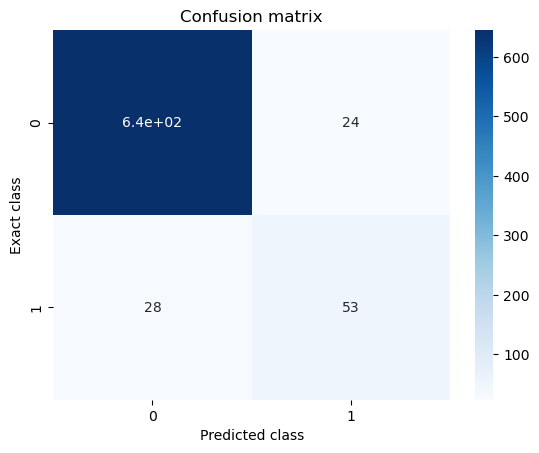

In [25]:
accuracy = accuracy_score(y_test,y_predict)
print('The accuracy of Logistic Regression is {:.4f}'.format(accuracy))

confus_matrix = confusion_matrix(y_test,y_predict)
plt.title('Confusion matrix')
sns.heatmap(confus_matrix,annot=True,cmap='Blues')
plt.xlabel('Predicted class')
plt.ylabel('Exact class');

serie = pd.Series(accuracy,index=['LogisticRegression'])
accuracy_Logmodel = pd.DataFrame({'accuracy':serie})

In [27]:
knc= KNeighborsClassifier()
knc.fit(x_train,y_train)

KNeighborsClassifier()

In [29]:
y_predict = knc.predict(x_test)

Accuracy of KneighborsClassifier is0.9667


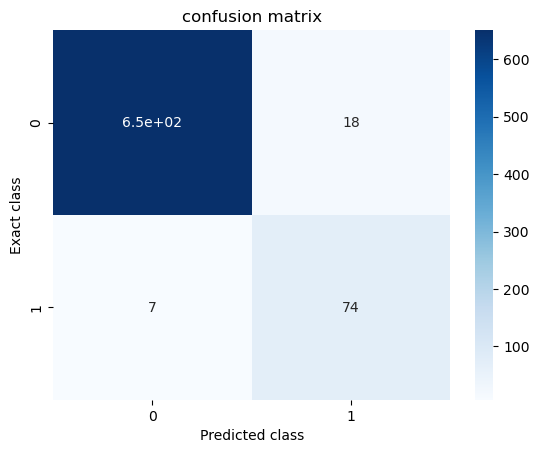

In [31]:
accuracy_KNmodel =accuracy_score(y_test,y_predict)
print('Accuracy of KneighborsClassifier is{:.4f}'.format(accuracy_KNmodel))

confus_matrix= confusion_matrix(y_test, y_predict)
plt.title("confusion matrix")
sns.heatmap(confus_matrix,annot=True,cmap='Blues')
plt.xlabel('Predicted class')
plt.ylabel('Exact class');

serie = pd.Series(accuracy,index=['KNeighborsClassifier'])
accuracy_KNmodel = pd.DataFrame({'accuracy':serie})

In [33]:
degree = np.arange(1,21)
train_score, val_score = validation_curve(KNeighborsClassifier(), x, y, param_name = 'n_neighbors' ,param_range=degree,cv=5)

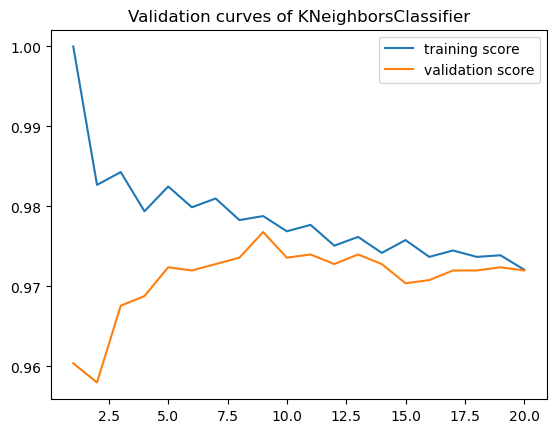

In [34]:
plt.title('Validation curves of KNeighborsClassifier')
plt.plot(degree,train_score.mean(axis = 1), label = 'training score')
plt.plot(degree,val_score.mean(axis = 1), label = 'validation score')
plt.legend();

In [35]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [36]:
y_predict=dtc.predict(x_test)

accuracy of DecisionTreeClassfier is 1.0000


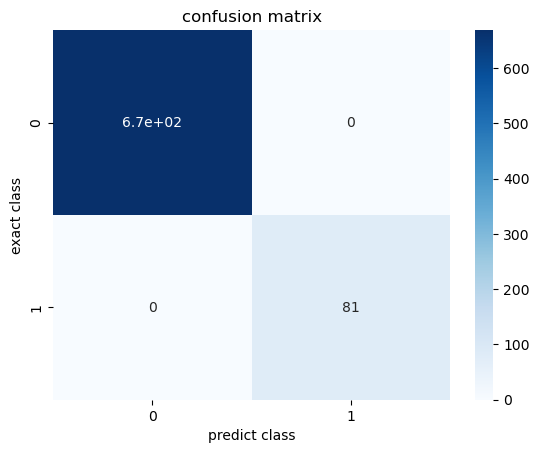

In [37]:
accuracy=accuracy_score(y_test,y_predict)
print("accuracy of DecisionTreeClassfier is {:.4f}".format(accuracy))

confus_matrix=confusion_matrix(y_test,y_predict)
plt.title("confusion matrix")
sns.heatmap(confus_matrix,annot=True,cmap='Blues')
plt.xlabel("predict class")
plt.ylabel("exact class")

serie = pd.Series(accuracy,index=['DecisionTreeClassifier'])
accuracy_DTmodel = pd.DataFrame({'accuracy':serie})

In [38]:
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10)

In [39]:
y_predict=rfc.predict(x_test)

accuracy score of RandomForestClassifier is 1.0000


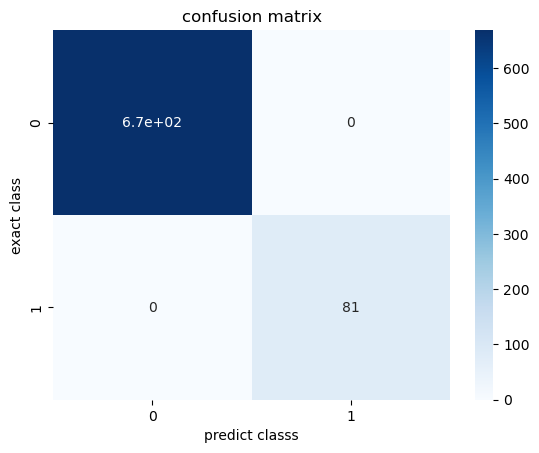

In [40]:
accuracy=accuracy_score(y_test,y_predict)
print('accuracy score of RandomForestClassifier is {:.4f}'.format(accuracy))

confus_matrix = confusion_matrix(y_test,y_predict)
plt.title('confusion matrix')
sns.heatmap(confus_matrix,annot=True,cmap='Blues')
plt.xlabel('predict classs')
plt.ylabel('exact class')

serie = pd.Series(accuracy,index=['RandomForestClassifier'])
accuracy_RFmodel = pd.DataFrame({'accuracy':serie})

In [43]:
degree = np.arange(1,21)
train_score, val_score = validation_curve(RandomForestClassifier(), x, y, param_name = 'n_estimators' ,param_range=degree,cv=5)

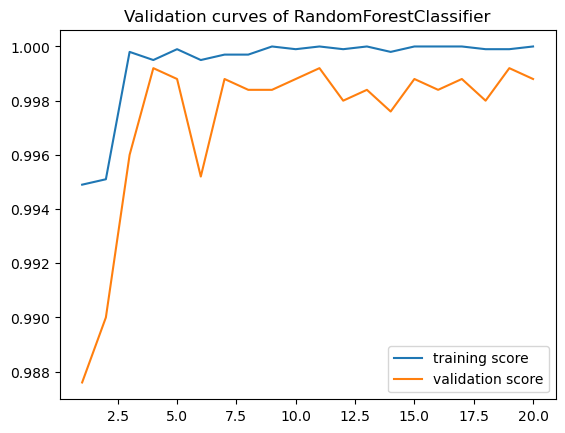

In [44]:
plt.title('Validation curves of RandomForestClassifier')
plt.plot(degree,train_score.mean(axis = 1), label = 'training score')
plt.plot(degree,val_score.mean(axis = 1), label = 'validation score')
plt.legend();

In [45]:
model = GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [46]:
y_predict = model.predict(x_test)

The accuracy of GaussianNB is 0.9693


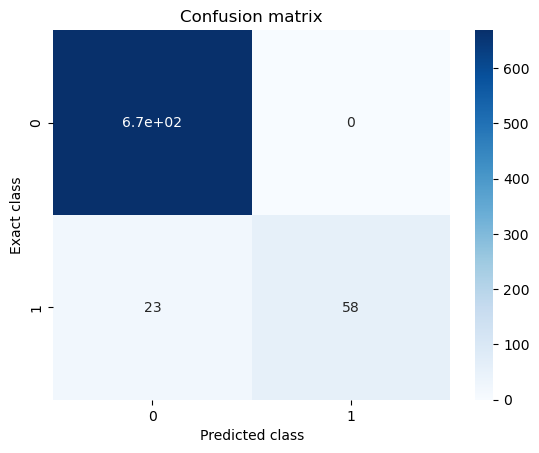

In [47]:
accuracy = accuracy_score(y_test,y_predict)
print('The accuracy of GaussianNB is {:.4f}'.format(accuracy))

confus_matrix = confusion_matrix(y_test,y_predict)
plt.title('Confusion matrix')
sns.heatmap(confus_matrix,annot=True,cmap='Blues')
plt.xlabel('Predicted class')
plt.ylabel('Exact class');

serie = pd.Series(accuracy,index=['GaussianNB'])
accuracy_NBmodel = pd.DataFrame({'accuracy':serie})

serie = pd.Series(accuracy,index=['GaussianNB'])
accuracy_NBmodel = pd.DataFrame({'accuracy':serie})

In [48]:
accuracy_models = pd.concat([accuracy_Logmodel,accuracy_KNmodel,accuracy_DTmodel,accuracy_RFmodel,accuracy_NBmodel])
accuracy_models

,accuracy
LogisticRegression,0.930667
KNeighborsClassifier,0.930667
DecisionTreeClassifier,1.000000
RandomForestClassifier,1.000000
GaussianNB,0.969333


In [49]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [50]:
y_predict = model.predict(x_test)

In [51]:
from sklearn.metrics import r2_score

r2_score(y_test,y_predict)

0.23434820189409

In [ ]:
!pip install lazypredict

In [83]:
label= LabelEncoder()
data['Rain']=label.fit_transform(data['Rain'])

x=data.drop('Rain',axis=1)
y=data['Rain']
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.4)

lc= LazyClassifier (verbose=0,ignore_warnings=True,random_state=42)
model,prediction = lc.fit(x_train,x_test,y_train,y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.90it/s]

[LightGBM] [Info] Number of positive: 118, number of negative: 882
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000159 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1278
[LightGBM] [Info] Number of data points in the train set: 1000, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118000 -> initscore=-2.011507
[LightGBM] [Info] Start training from score -2.011507
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

In [85]:
model

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,1.00,1.00,1.00,1.00,0.03
BaggingClassifier,1.00,1.00,1.00,1.00,0.05
XGBClassifier,1.00,1.00,1.00,1.00,0.05
SVC,1.00,1.00,1.00,1.00,0.03
SGDClassifier,1.00,1.00,1.00,1.00,0.03
RidgeClassifierCV,1.00,1.00,1.00,1.00,0.02
RidgeClassifier,1.00,1.00,1.00,1.00,0.02
RandomForestClassifier,1.00,1.00,1.00,1.00,0.27
QuadraticDiscriminantAnalysis,1.00,1.00,1.00,1.00,0.03


In [89]:
prediction

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,1.00,1.00,1.00,1.00,0.03
BaggingClassifier,1.00,1.00,1.00,1.00,0.05
XGBClassifier,1.00,1.00,1.00,1.00,0.05
SVC,1.00,1.00,1.00,1.00,0.03
SGDClassifier,1.00,1.00,1.00,1.00,0.03
RidgeClassifierCV,1.00,1.00,1.00,1.00,0.02
RidgeClassifier,1.00,1.00,1.00,1.00,0.02
RandomForestClassifier,1.00,1.00,1.00,1.00,0.27
QuadraticDiscriminantAnalysis,1.00,1.00,1.00,1.00,0.03
